# Cuadro de Mandos utilizando Pandas y madrid.json obtenido con Tweepy

## 1. Importar librerías y json

In [156]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def parseMultipleJSON3(lines):
    lines = ''.join(lines).split('}{')
    data = [json.loads('%s}' % line) 
        if idx == 0 else json.loads('{%s' % line) 
        if idx == len(lines)-1 
        else json.loads('{%s}' % line) 
        for idx, line in enumerate(lines)]
    return data

with open('madrid.json','r') as json_file:
    lines = json_file.readlines()
    lines = [line.strip("\n") for line in lines]
    data = parseMultipleJSON3(lines)

df = pd.DataFrame(data)

## 2. Vemos qué columnas tenemos disponibles para seleccionar nuestros datos

In [157]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'is_quote_status', 'quote_count', 'reply_count', 'retweet_count',
       'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level',
       'lang', 'timestamp_ms', 'extended_entities', 'possibly_sensitive',
       'display_text_range', 'extended_tweet'],
      dtype='object')

## 3. Crearemos un nuevo datasheet en el que almacenaremos el dato que queremos representar, en nuestro caso, el idioma del tweet(lang)

In [158]:
data2 = np.unique(df.lang, return_counts = True)

In [159]:
data2

(array(['ar', 'ca', 'cs', 'da', 'en', 'es', 'fa', 'fr', 'ht', 'in', 'ja',
        'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sv', 'tl', 'tr', 'und'],
       dtype=object),
 array([  1,  54,   1,   1,  98, 587,   1,  62,   6,   9,   5,   2,   1,
          1, 407,   1,   1,   1,   9,   3,  23], dtype=int64))

## 4.1 Representaremos el dato seleccionado en un gráfico de barras, por ejemplo

[Text(0.5, 0, 'Lenguajes'), Text(0, 0.5, 'tweets')]

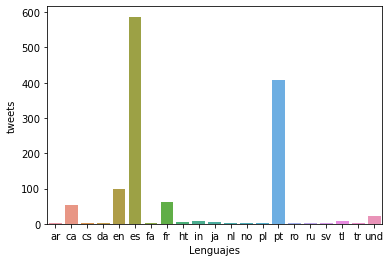

In [160]:
plt = sns.barplot(x = data2[0], y = data2[1])
plt.set(xlabel = "Lenguajes", ylabel = "tweets")

## 4.2 Otra forma de representarlo es con gráfico de "quesito" (pie)

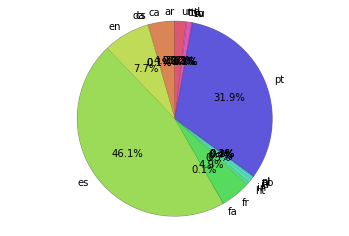

In [161]:
import matplotlib.pyplot as plt
# He tenido que importar la librería de nuevo aquí porque daba fallo

fig1, ax1 = plt.subplots()
ax1.pie(data2[1], 
        labels=data2[0],
        colors = sns.color_palette("hls",21),
        autopct='%1.1f%%', 
        shadow=True,
        # Intenté hacer el gráfico más grande cambiando el radio pero no funciona
        radius = 100,
        startangle=90)
ax1.axis('equal') 

plt.show()